Aprendizaje Automático · Grado en Ingeniería Informática · Curso 2022/23
---
**Cuaderno 1** - Práctica 1: Predicción de la producción de energía solar
<br><br>
***Grupo Reducido 82 - Grupo de laboratorio 13***

# Importación de librerías y datos

Primero, importamos el set inicial de la carpeta de drive.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Hemos importado todas las librerias y funciones de Python que necesitaremos a lo largo del cuaderno.

In [8]:
# librerias basicas
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# metricas
from sklearn.metrics import mean_absolute_error, confusion_matrix, f1_score, mean_squared_error, r2_score, accuracy_score

# modelos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor


from sklearn.linear_model import LinearRegression

Definimos las funciones auxiliares que utilizaremos a lo largo del trabajo

In [9]:
def rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)  # Calcula el MSE
    return np.sqrt(mse)

# EDA




Para el análisis exploratorio de datos, seguiremos los siguientes pasos:
- Limpieza de datos.
- Número de instancias y atributos.
- Tipo de atributos.
- Missing values.
- Tipo de problema.

##**Limpieza**
---
Eliminamos todas las variables que no correspondan a la localización de **Sotaventeo**, que en este caso se correponde con el set número 13. Incluiremos también la energia y el datetime.


In [10]:
# Carga el archivo /wind_ava.csv
# df = pd.read_csv('/content/drive/MyDrive/wind_ava.csv/wind_ava.csv')
df = pd.read_csv('wind_ava.csv')

# Elimina todos los campos que no terminen en 13
columnas = df.columns[df.columns.str.endswith('13') | (df.columns == 'energy') | (df.columns == 'datetime')]
df = df[columnas]

# Guarda el resultado en /wind_ava_13.csv
df.to_csv('wind_ava_13.csv', index=False)

# print(df)

## **Características e instancias**
---

In [11]:
print(df.shape)

(4748, 24)


Dentro de los datos, encontramos 22 atributos, 24 si tenemos en cuenta la fecha y la energía y la variable de respuesta *salida*. En total, tenemos **4748 instancias**.

Los **datos de competición** cuentan con las mismas variables de entrada que los datos. En este caso, recogidos durante 1 años de datos y 4 instancias por día. No se proporciona la variable de respuesta, ya que se usará nuestro modelo final a la hora de hacer predicciones.
</br></br>


El problema cuenta con un total de **22 atributos**, que se corresponden con diferentes variables meteorológicas.</br></br>


| Atributo | Descripción |
| :- | -: |
| `t2m` | Temperatura de 2 metros |
| `u10` | Componente de viento U de 10 metros |
| `v10` | Componente de viento de 10 metros V |
| `u100` | Componente de viento U de 100 metros |
| `v100` | Componente de viento de 100 metros V |
| `cape`	 | Energía potencial convectiva disponible |
| `flsr`	 | Logaritmo de pronóstico de rugosidad superficial para calor |
| `fsr`	 | Pronóstico de rugosidad de la superficie |
| `iewv` | Tensión superficial turbulenta instantánea hacia el este |
| `inss` | Superficie turbulenta instantánea hacia el norte|
| `lai_hv` | Índice de área foliar, vegetación alta |
| `lai_lv` | Índice de área foliar, vegetación baja	|
| `u10n` | Viento neutro a 10 m de componente u |
| `v10n` | Viento neutro a 10 m de componente v |
| `stl1` | Nivel de temperatura del suelo 1 |
| `stl2` | Nivel de temperatura del suelo 2 |
| `stl3` | Nivel de temperatura del suelo 3|
| `stl4` | Nivel de temperatura del suelo 4 |
| `sp` | Presión superficial |
| `p54.162` | Integral vertical de temperatura |
| `p59.162` | Integral vertical de divergencia de energía cinética |
| `p55.162` | Integral vertical del vapor de agua |


## **Outliers**
---


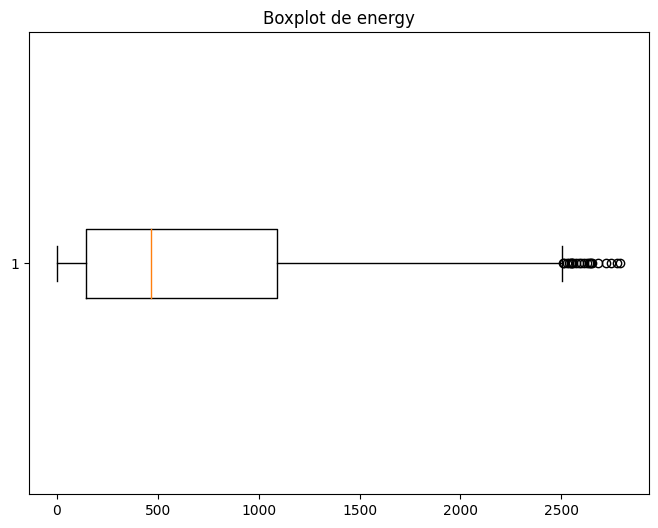

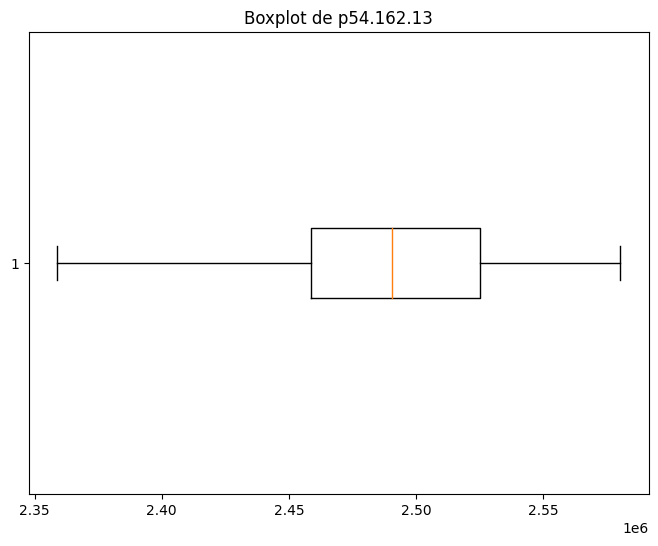

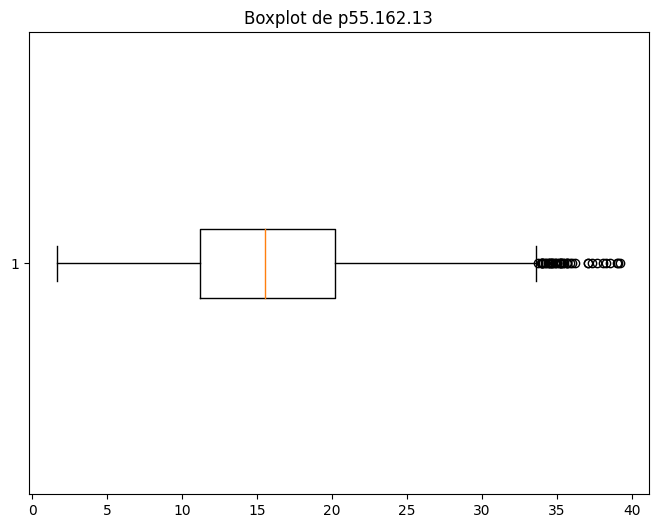

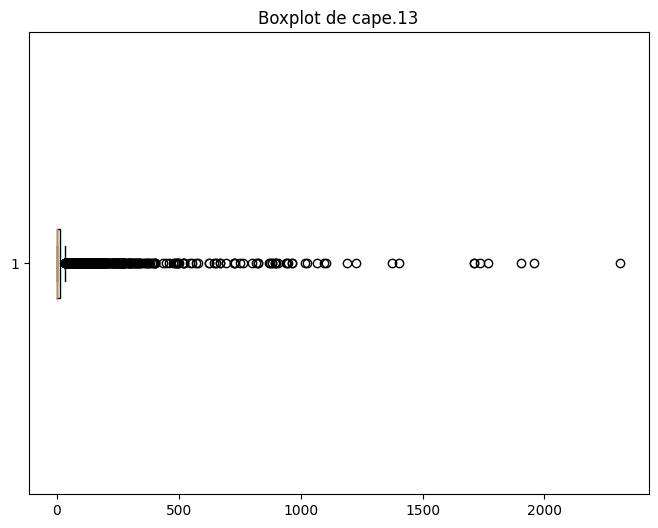

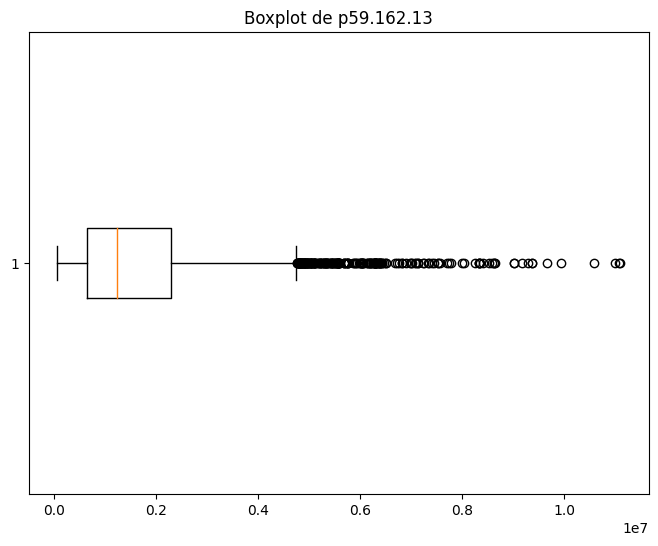

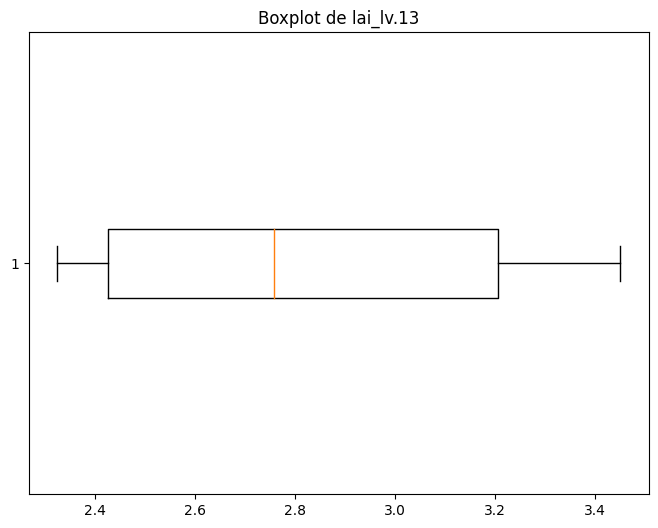

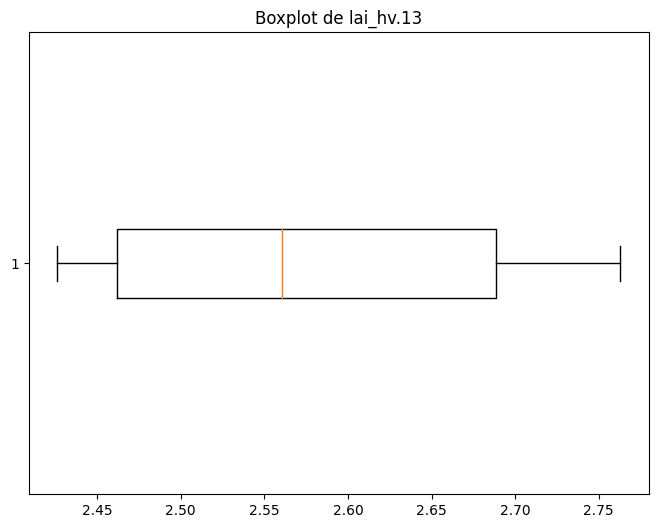

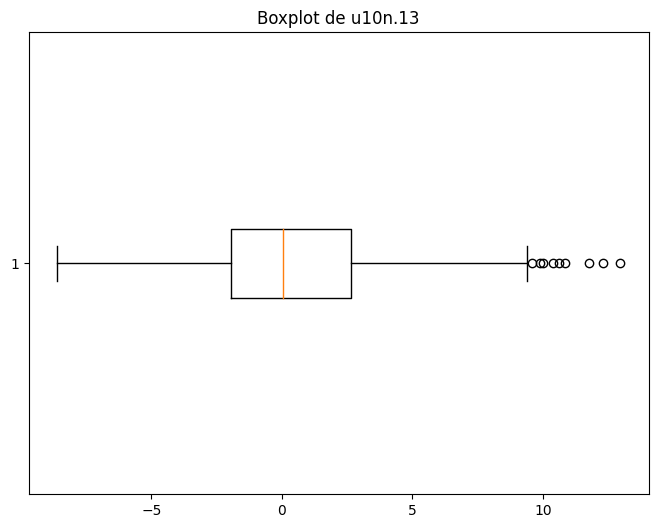

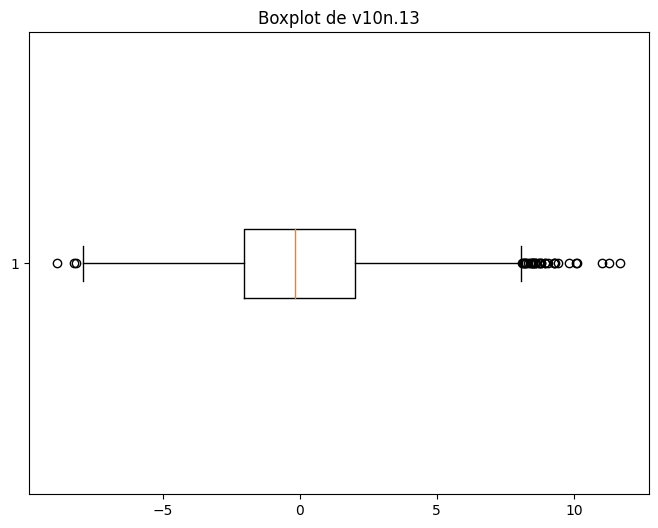

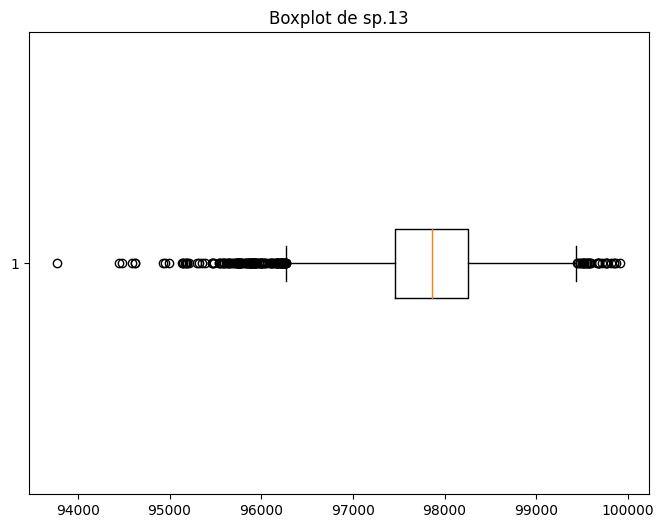

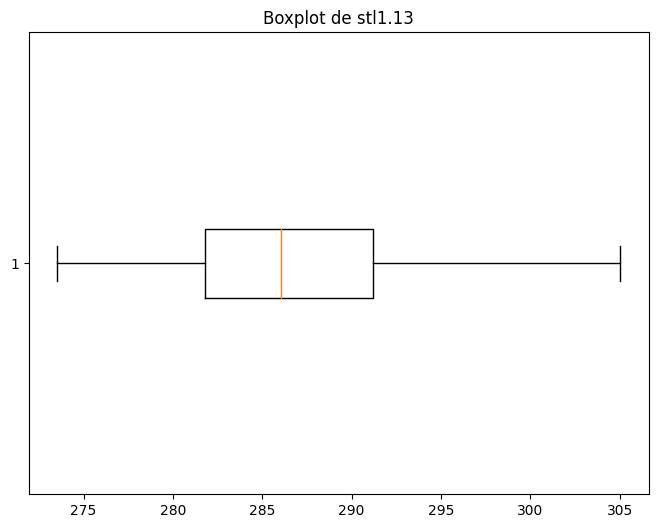

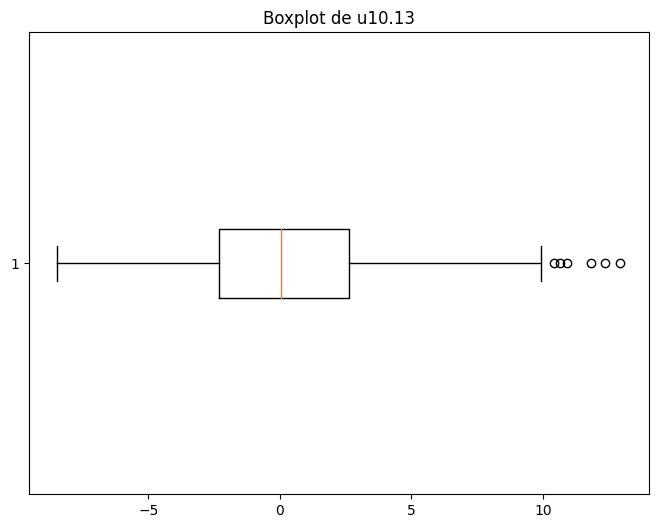

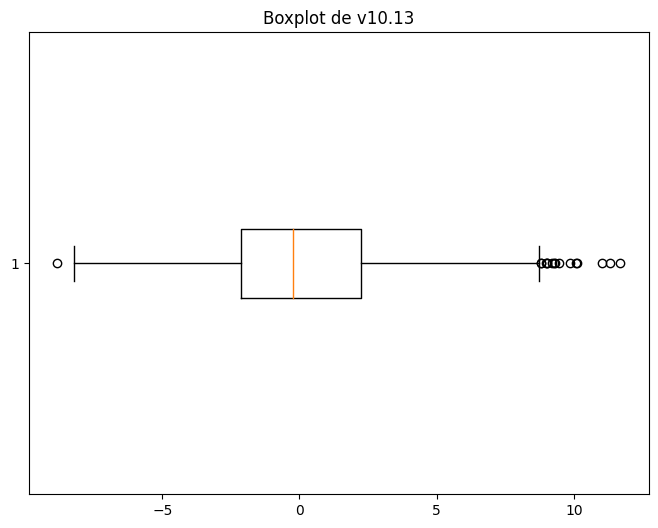

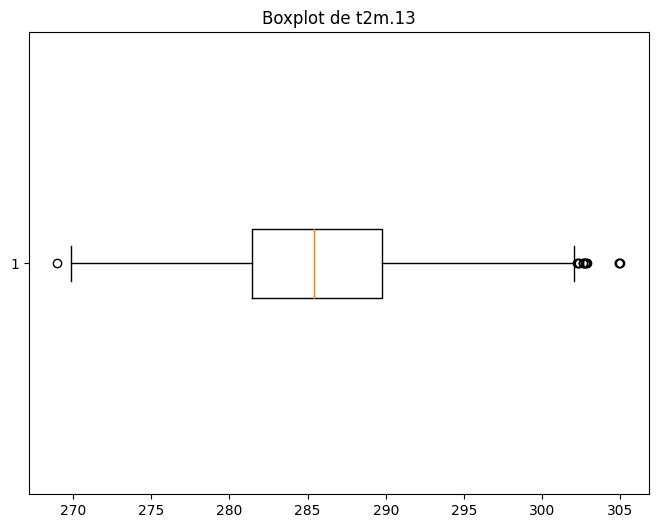

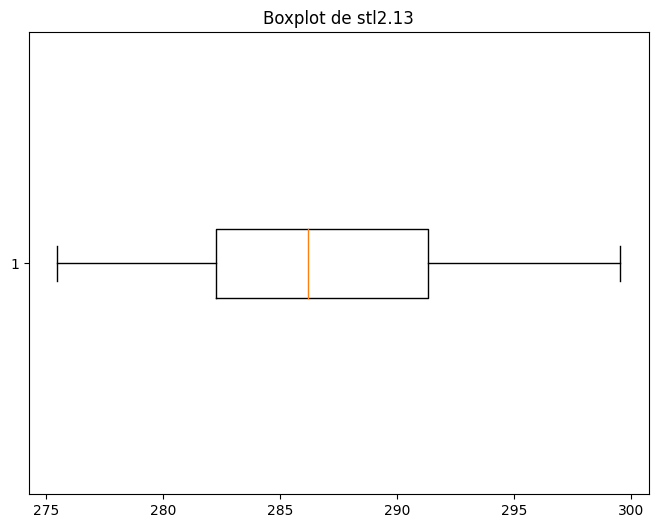

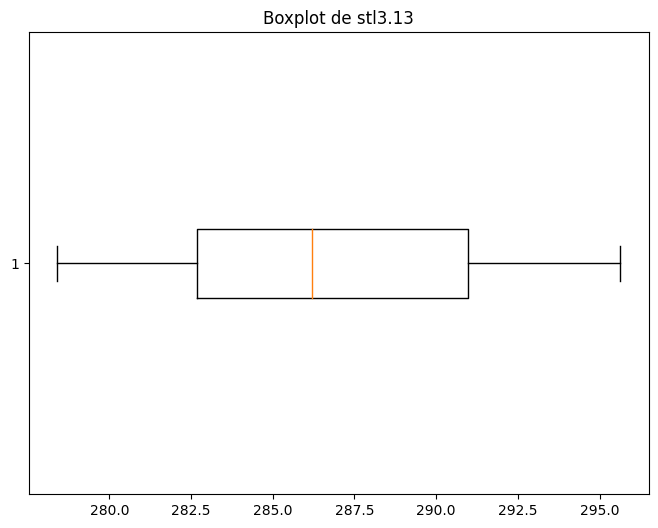

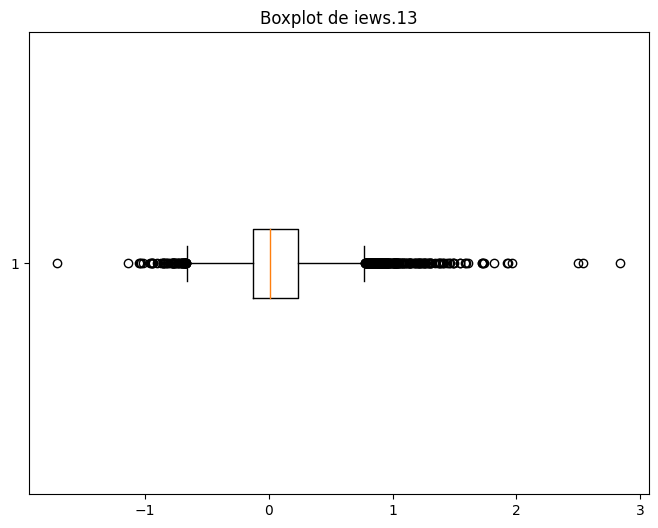

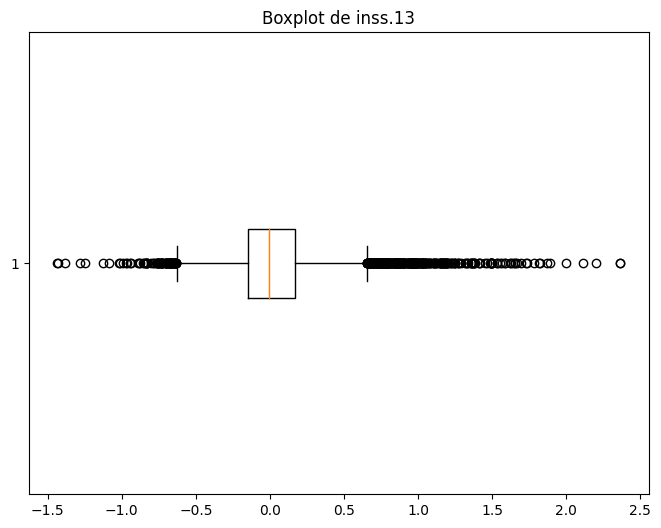

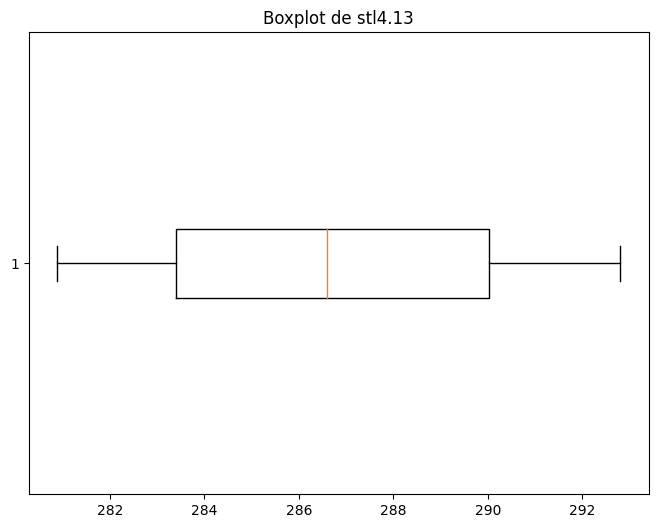

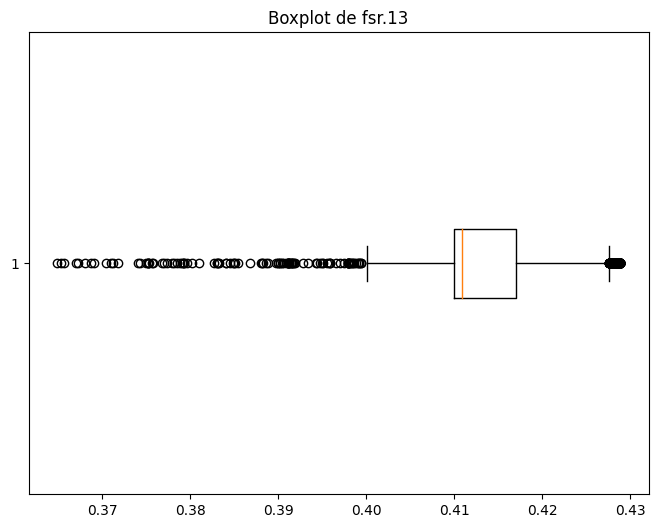

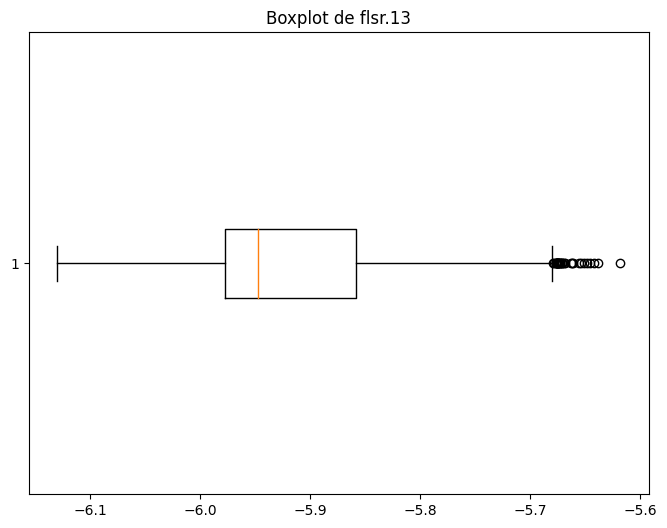

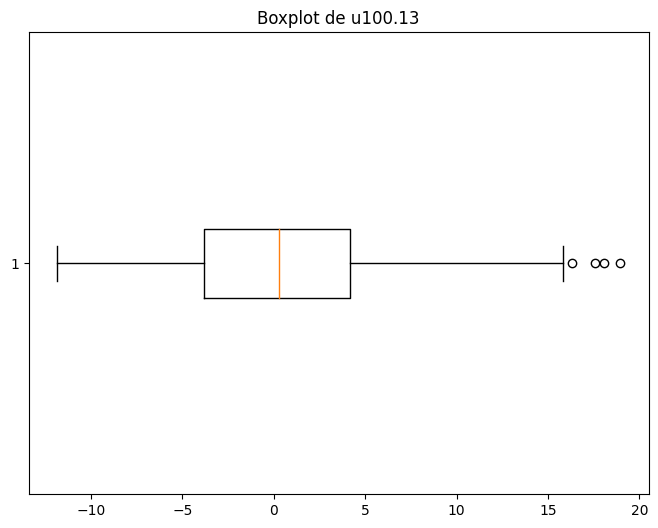

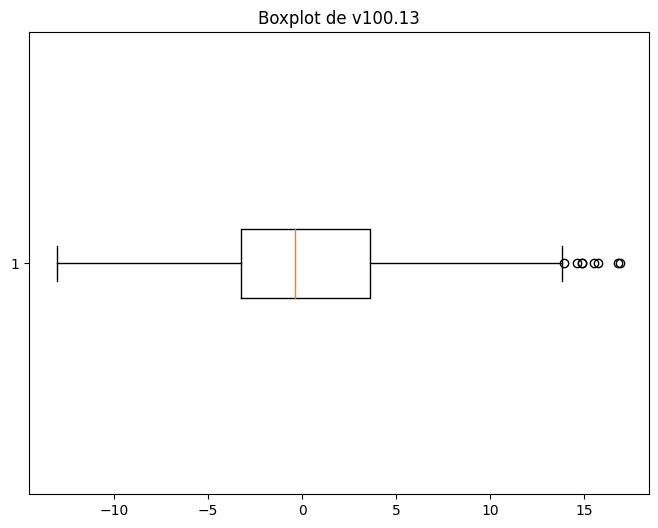

In [14]:
df = pd.read_csv('wind_ava_13.csv')
# Eliminar todos los campos que no terminen en 13
columnas = df.columns
df = df[columnas]


# Crear un boxplot para cada atributo
for columna in df.columns:
    if columna != 'datetime':
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[columna], vert=False)
        plt.title('Boxplot de {}'.format(columna))
        #plt.xlabel('Valor')
        #plt.ylabel(str(columna))
        plt.show()

Como se puede observar, encontramos outliers en bastantes de los atributos. Sin embargo, los dejaremos tal cual están, ya que al tratarse de variables metereológicas es normal que haya outliers.

## **Clasificación de variables**
---
Tipo de variables del problema (categóricas, numéricas)

In [ ]:
print(df.dtypes)

datetime       object
energy        float64
p54.162.13    float64
p55.162.13    float64
cape.13       float64
p59.162.13    float64
lai_lv.13     float64
lai_hv.13     float64
u10n.13       float64
v10n.13       float64
sp.13         float64
stl1.13       float64
u10.13        float64
v10.13        float64
t2m.13        float64
stl2.13       float64
stl3.13       float64
iews.13       float64
inss.13       float64
stl4.13       float64
fsr.13        float64
flsr.13       float64
u100.13       float64
v100.13       float64
dtype: object


En este caso, podemos ver como todos los atributos son numéricos reales, a escepción de la variable de salida, que es de tipo numérico entero.

##**Missing values**
---

Comprobaremos si existen missing values, haciendo una suma de estos dentro de cada atributo y en el total de nuestro dataframe.

In [ ]:
print(df.columns[df.isnull().any()])
print(df.isnull().sum())

Index([], dtype='object')
datetime      0
energy        0
p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64


Vemos que claramente, no falta ningun valor, por lo que podemos proceder sin hacer ajustes.

##**Columnas constantes**
---

In [ ]:
print(df.columns[df.nunique() <= 1])

Index([], dtype='object')


No encontramos ninguna columna constante.

##**Tipo de problema**
---

Concluimos que es un problema de regresión debido a la ausencia de clases. El objetivo del problema es predecir el valor de una variable numérica discreta.


# Evaluación Inner y Outter


OUTER -> split train/test


INNER -> predefined split (qué datos son train y test, se lo metemos        manualmente) para hacer gridsearch
        no se puede hacer una validación cruzada normal (x lo de q son datos cronologicos) pero sí una validación cruzada asegurando que los datos de test son siempre posteriores a los datos de train (tendremos que utilizar el times series split)

Realizaemos una división de datos ...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

# Outer Evaluation - Entrenamiento y test

train, test = train_test_split(df, test_size = 0.25, shuffle = False)
print("Tamaño train = ", train.shape, " Tamaño test = ", test.shape)
print(f"Fechas de train: {train.iloc[0].datetime} - {train.iloc[-1].datetime}")
print(f"Fechas de test: {test.iloc[0].datetime} - {test.iloc[-1].datetime}")

x = df['energy']
y = df.drop(columns=['energy']) # El resto de columnas
x_train = train.drop(['datetime', 'energy'], axis='columns')
y_train = train[['energy']]
x_test = test.drop(['datetime', 'energy'], axis='columns')
y_test = test[['energy']]


# Inner evaluation - TIMES SERIES SPLIT (obtener varios test/validation dentro del train test - inner)
data_splits = []
tss = TimeSeriesSplit(n_splits = 3)

for k, data in enumerate(tss.split(x_train, y_train)):
  cv_train, cv_val = data
  print(f"En la iteración {k+1}, los índices son:")
  print(f"  Train: {cv_train[0]} - {cv_train[-1]}")
  print(f"  Val: {cv_val[0]} - {cv_val[-1]}")
  data_splits.append([cv_train[0], cv_train[-1], cv_val[0], cv_val[-1]])

print("El formato de data_splits es [train 1, train último, validación 1, validación último]:")
print(data_splits)

Tamaño train =  (3561, 24)  Tamaño test =  (1187, 24)
Fechas de train: 2005-01-02 18:00:00 - 2007-12-03 06:00:00
Fechas de test: 2007-12-03 12:00:00 - 2009-12-31 18:00:00
En la iteración 1, los índices son:
  Train: 0 - 890
  Val: 891 - 1780
En la iteración 2, los índices son:
  Train: 0 - 1780
  Val: 1781 - 2670
En la iteración 3, los índices son:
  Train: 0 - 2670
  Val: 2671 - 3560
El formato de data_splits es [train 1, train último, validación 1, validación último]:
[[0, 890, 891, 1780], [0, 1780, 1781, 2670], [0, 2670, 2671, 3560]]


Hemos decidido utilizar MAE, MSE y RMSE para la evaluación externa e interna, para ayudarnos a entender cuánto se equivoca el modelo en sus predicciones.
MAE nos dice cuánto se equivoca en promedio, mientras que MSE y RMSE le dan más peso a los errores grandes.

Además, realizaremos validación cruzada para probar el modelo en diferentes conjuntos de datos, y observar su funcionamiento y adaptabilidad.

#Previo KNN
En este apartado, identificaremos cuál es el mejor método de escalado para aplicar en el siguiente apartado en el entrenamiento del modelo KNN. Compararemos la performance entre el escalado estandars y MinMax.

Para ello, primero dividiremos los datos en dos conjuntos de train y test

Después, probaremos ambos métodos de escalado y compararemos el error cuadrático medio y el coeficiente de determinación para elegir el mejor.

In [ ]:
from sklearn.preprocessing import StandardScaler

#Feature scaling
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
print(y_train)

# Define the model: Init K-NN
knn = KNeighborsRegressor(n_neighbors=5)

# knn.fit(x_train_scaled, y_train)
knn.fit(x_train, y_train)

       energy
0      402.71
1      696.80
2     1591.15
3     1338.62
4      562.50
...       ...
3556   709.36
3557  2289.00
3558  2249.30
3559  1665.56
3560  1041.89

[3561 rows x 1 columns]


KNeighborsRegressor()

##**Estandarización y Normalización**
---
En este apartado, partiremos el conjunto de datos para train y test, y compararemos los scalers de estandarización y normalización para comprobar cual de ellos se ajusta mejor a nuestro problema

### División de datos

Primero, realizaremos una nueva partición de datos del conjunto entre train y test; y dentro del train separaremos de nuevo entre un conjunto de entranamiento (train_train) y otro de validación (train_validation)

In [ ]:
# Separar características (X) y etiquetas (y)
X = df.drop(['energy', 'datetime'], axis=1)
y = df['energy']

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Dividir el conjunto de entrenamiento en conjunto de entrenamiento (75%) y validación (25%), ya que el test set solo se utilizará al final.
x_train_train, x_train_validation, y_train_train, y_train_validation = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Muestra el tamaño de los datos de entrenamiento y test nuevos.
print('Datos train_train: ' , x_train_train.shape, y_train_train.shape)
print('Datos train_test: ' , x_train_validation.shape, y_train_validation.shape)

Datos train_train:  (2670, 22) (2670,)
Datos train_test:  (891, 22) (891,)


###Normalización

In [ ]:
norm = MinMaxScaler()
x_train_train_n = norm.fit_transform(x_train_train)
x_train_validation_n = norm.transform(x_train_validation)

# Entrenar el modelo KNN
knn.fit(x_train_train_n, y_train_train)

# Predecir y evaluar el rendimiento
y_pred_n = knn.predict(x_train_validation_n)
mse = mean_squared_error(y_train_validation, y_pred_n)
r2 = r2_score(y_train_validation, y_pred_n)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 174434.53187041078
Coeficiente de determinación (R^2): 0.6174134269778027


###Estandarización

In [ ]:
# Escalado usando estandarización
est = StandardScaler()
x_train_train_std = est.fit_transform(x_train_train)
x_train_validation_std = est.transform(x_train_validation)

y_train_train_std = est.fit_transform(np.array(y_train_train).reshape(-1, 1))
y_train_validation_std = est.transform(np.array(y_train_validation).reshape(-1, 1))

# Entrenar el modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_train_std, y_train_train)

# Predecir y evaluar el rendimiento
y_pred_std = knn.predict(x_train_validation_std)

mse = mean_squared_error(y_train_validation, y_pred_std)
r2 = r2_score(y_train_validation, y_pred_std)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

x_train_std = est.fit_transform(x_train)
y_train_array = y_train.values
y_train_reshaped = y_train_array.reshape(-1, 1)
y_train_std = est.fit_transform(y_train_reshaped)

Error cuadrático medio (MSE): 169990.7586746577
Coeficiente de determinación (R^2): 0.6271599372588869


El MSE es menor en el escalado estandar y el coeficiente de determinación es mayor, esto sugiere que el segundo modelo tiene un mejor rendimiento en términos de ajuste a los datos y capacidad para explicar la variabilidad en los datos de respuesta, aunque la diferencia entre las métricas de ambos modelos no es significativa.


# Métodos básicos
En este apartado, realizaremos los siguientes métodos con sus parámetros por omisión y obtendremos sus métricas para después poder compararlos:
- KNN
- Árboles de regresión
- Regresión lineal
- SVM.

Durante el proceso, seguiremos los siguientes pasos para cada uno de los métodos:

1. Entrenaremos el modelo con sus parámetros por omisión (HPO)
2. Evaluaremos nuestro modelo mediante validación cruzada
3. Definiremos un modelo dummy para comprender más sobre la calidad de nuestro modelo.
4. Realizaremos el ajuste de hiperparámetros.


Durante todo el trabajo, utilizaremos como semilla el nia de uno de los miembros de equipo, en este caso, 100472315.


## **KNN**
---

1. Entrenamiento de hiperparámetros por omisión

In [ ]:
np.random.seed(100472315)

knn = KNeighborsRegressor()

# Entrenamiento
start= time.time()
knn.fit(x_train_train_std, y_train_train)
end = time.time()
tiempo_knn = end - start
print("Tiempo: ", tiempo_knn)

print(f"Hiperparametros:  {knn.get_params()}")

# Predecir y evaluar el rendimiento
y_pred = knn.predict(x_train_validation_std)

# print(y_train_validation, y_pred)
mse = mean_squared_error(y_train_validation, y_pred)
r2 = r2_score(y_train_validation, y_pred)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

# print mae, rmse
rmse_knn = np.sqrt(mse)
mae_knn = mean_absolute_error(y_train_validation, y_pred)
print("RMSE: ", rmse_knn)
print("MAE: ", mae_knn)

Tiempo:  0.0031464099884033203
Hiperparametros:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Error cuadrático medio (MSE): 169990.7586746577
Coeficiente de determinación (R^2): 0.6271599372588869
RMSE:  412.29935565636976
MAE:  305.56008080808084


2. Validación cruzada

In [ ]:
scaler = est
# Número de días de entrenamiento y test.
N_train = x_train_train_std.shape[0]
N_val = y_train_validation.shape[0]

# Selector para validación cruzada
selector = [-1] * N_train + [0] * N_val
#selector = [-1] * N_train

# Objeto PredefinedSplit.
ps = PredefinedSplit(selector)

# Usar el predefined split para la validación cruzada (con medición del tiempo).
cv_knn = KNeighborsRegressor()


start = time.time()
rmse_knn_cv = cross_val_score(cv_knn, x_train_std, y_train_std, cv=ps, scoring='neg_root_mean_squared_error')
end = time.time()
time1_knn_cv = end - start

start = time.time()
mae_knn_cv = cross_val_score(cv_knn, x_train_std, y_train_std, cv=ps, scoring='neg_mean_absolute_error')
end = time.time()
time2_knn_cv = end - start


# Denormalizar los datos.
rmse_knn_cv = scaler.inverse_transform(rmse_knn_cv.reshape(-1, 1)).ravel()
mae_knn_cv = scaler.inverse_transform(mae_knn_cv.reshape(-1, 1)).ravel()

# print mae, rmse
print(f'Tiempo de entrenamiento (RMSE): {time1_knn_cv:.5f} segundos.')
print(f'Tiempo de entrenamiento (MAE): {time2_knn_cv:.5f} segundos.')
print("Raiz del Error cuadrático medio (RMSE):", rmse_knn_cv)
print("Mean Absolute Error (MAE):", mae_knn_cv)

Tiempo de entrenamiento (RMSE): 0.02663 segundos.
Tiempo de entrenamiento (MAE): 0.01634 segundos.
Raiz del Error cuadrático medio (RMSE): [314.11681738]
Mean Absolute Error (MAE): [413.83324969]


3. Modelo Dummy

In [ ]:
scaler = est

dummy_1_knn = DummyRegressor(strategy='mean')
dummy_2_knn = DummyRegressor(strategy='median')

# Entrenamiento de los modelos dummy (con medición del tiempo).
start = time.time()
dummy_1_knn.fit(x_train_train_std, y_train_train)
end = time.time()
time_knn_dm1 = end - start

start = time.time()
dummy_2_knn.fit(x_train_train_std, y_train_train)
end = time.time()
time_knn_dm2 = end - start

#TODO: cambiar
print(f'Tiempo de entrenamiento (mean): {time_knn_dm1:.5f} segundos.')
print(f'Tiempo de entrenamiento (median): {time_knn_dm2:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_dummy_1_std = dummy_1_knn.predict(x_train_validation_std).reshape(-1, 1)
y_pred_dummy_2_std = dummy_2_knn.predict(x_train_validation_std).reshape(-1, 1)

# Denormalizar los datos (aunque se podría RMSE y MAE sin denormalizar).
y_pred_dummy_1 = scaler.inverse_transform(y_pred_dummy_1_std)
y_pred_dummy_2 = scaler.inverse_transform(y_pred_dummy_2_std)

# Cálculo del error cuadrático medio.

rmse_knn_dm1 = rmse(y_train_validation.values.reshape(-1), y_pred_dummy_1.reshape(-1))
rmse_knn_dm2 = rmse(y_train_validation.values.reshape(-1), y_pred_dummy_2.reshape(-1))
print(f'\nRMSE (mean): {rmse_knn_dm1}')
print(f'RMSE (median): {rmse_knn_dm2}')

# Cálculo del error absoluto medio.
mae_knn_dm1 = mean_absolute_error(y_train_validation, y_pred_dummy_1)
mae_knn_dm2 = mean_absolute_error(y_train_validation, y_pred_dummy_2)
print(f'MAE (mean): {mae_knn_dm1}')
print(f'MAE (median): {mae_knn_dm2}')

#TODO: revisar
rmse_knn= rmse(y_train_validation, y_pred)
mae_knn = mean_absolute_error(y_train_validation, y_pred)

# Relación entre el error del modelo y el error de los modelos dummy.
print(f'\nRMSE dummy (mean)/RMSE KNN: {rmse_knn_dm1/rmse_knn}')
print(f'RMSE dummy (median)/RMSE KNN: {rmse_knn_dm2/rmse_knn}')
print(f'MAE dummy (mean)/MAE KNN: {mae_knn_dm1/mae_knn}')
print(f'MAE dummy (median)/MAE KNN: {mae_knn_dm2/mae_knn}')

# Tiempo total consumido
tiempo_total_knn = tiempo_knn + time1_knn_cv + time2_knn_cv + time_knn_dm1 + time_knn_dm2

Tiempo de entrenamiento (mean): 0.00119 segundos.
Tiempo de entrenamiento (median): 0.00194 segundos.

RMSE (mean): 460505.98349667573
RMSE (median): 311413.40307014313
MAE (mean): 460505.48845963017
MAE (median): 311412.6710282186

RMSE dummy (mean)/RMSE KNN: 1116.9214241520274
RMSE dummy (median)/RMSE KNN: 755.3089734384405
MAE dummy (mean)/MAE KNN: 1507.0865514951508
MAE dummy (median)/MAE KNN: 1019.1536479655982


## **ÁRBOL DE REGRESIÓN**
---


1. Entrenamiento de hiperparámetros por omisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

base_tree = DecisionTreeRegressor()

# Entrenamiento (con medición del tiempo).
start = time.time()
base_tree.fit(x_train_train, y_train_train)
end = time.time()
time_tree = end - start
print(f'Tiempo de entrenamiento: {time_tree:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred = base_tree.predict(x_train_validation)

# Cálculo del error cuadrático medio.
rmse_tree = rmse(y_train_validation, y_pred)
print(f'\nError cuadrático medio del modelo Árbol de decisión: {rmse_tree}')

# Cálculo del error absoluto medio.
mae_tree = mean_absolute_error(y_train_validation, y_pred)
print(f'Error absoluto medio del modelo Árbol de decisión: {mae_tree}')

Tiempo de entrenamiento: 0.19209 segundos.

Error cuadrático medio del modelo Árbol de decisión: 500.90591306383277
Error absoluto medio del modelo Árbol de decisión: 362.89764309764314


2. Validación cruzada

In [ ]:
# Usar el predefined split para la validación cruzada (con medición del tiempo).
cv_tree = DecisionTreeRegressor()

start = time.time()
rmse_tree_cv = cross_val_score(cv_tree, x_train_std, y_train_std, cv=ps, scoring='neg_root_mean_squared_error')
end = time.time()
time1_tree_cv = end - start

start = time.time()
mae_tree_cv = cross_val_score(cv_tree, x_train, y_train, cv=ps, scoring='neg_mean_absolute_error')
end = time.time()
time2_tree_cv = end - start


print(f'Tiempo de entrenamiento: {time1_tree_cv:.5f} segundos.')
print(f'Tiempo de entrenamiento: {time2_tree_cv:.5f} segundos.')
print(f'\nRMSE: {-rmse_tree_cv.mean()}')
print(f'MAE: {-mae_tree_cv.mean()}')

Tiempo de entrenamiento: 0.24297 segundos.
Tiempo de entrenamiento: 0.20771 segundos.

RMSE: 0.7348844555013904
MAE: 352.04514029180694


3. Modelo Dummy

In [ ]:
dummy_1_tree = DummyRegressor(strategy='mean')
dummy_2_tree = DummyRegressor(strategy='median')

# Entrenamiento de los modelos dummy (con medición del tiempo).
start = time.time()
dummy_1_tree.fit(x_train_train, y_train_train)
end = time.time()
time_tree_dm1 = end - start

start = time.time()
dummy_2_tree.fit(x_train_train, y_train_train)
end = time.time()
time_tree_dm2 = end - start

print(f'Tiempo de entrenamiento (mean): {time_tree_dm1:.5f} segundos.')
print(f'Tiempo de entrenamiento (median): {time_tree_dm2:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_dummy_1 = dummy_1_tree.predict(x_train_validation)
y_pred_dummy_2 = dummy_2_tree.predict(x_train_validation)

# Cálculo del error cuadrático medio.
rmse_tree_dm1 = rmse(y_train_validation, y_pred_dummy_1)
rmse_tree_dm2 = rmse(y_train_validation, y_pred_dummy_2)
print(f'\nRMSE (mean): {rmse_tree_dm1}')
print(f'RMSE (median): {rmse_tree_dm2}')

# Cálculo del error absoluto medio.
mae_tree_dm1 = mean_absolute_error(y_train_validation, y_pred_dummy_1)
mae_tree_dm2 = mean_absolute_error(y_train_validation, y_pred_dummy_2)
print(f'MAE (mean): {mae_tree_dm1}')
print(f'MAE (median): {mae_tree_dm2}')

# Relación entre el error del modelo y el error de los modelos dummy.
print(f'\nRMSE dummy (mean)/RMSE tree: {rmse_tree_dm1/rmse_tree}')
print(f'RMSE dummy (median)/RMSE tree: {rmse_tree_dm2/rmse_tree}')
print(f'MAE dummy (mean)/MAE tree: {mae_tree_dm1/mae_tree}')
print(f'MAE dummy (median)/MAE tree: {mae_tree_dm2/mae_tree}')

# Tiempo total consumido
tiempo_total_tree = time_tree + time1_tree_cv + time2_tree_cv +time_tree_dm2 + time_tree_dm1

Tiempo de entrenamiento (mean): 0.00103 segundos.
Tiempo de entrenamiento (median): 0.00105 segundos.

RMSE (mean): 675.4084144468707
RMSE (median): 716.4596293109664
MAE (mean): 557.9290557594253
MAE (median): 534.8148989898989

RMSE dummy (mean)/RMSE tree: 1.3483738099949325
RMSE dummy (median)/RMSE tree: 1.4303277534271484
MAE dummy (mean)/MAE tree: 1.537428160174923
MAE dummy (median)/MAE tree: 1.4737348372527148


## **REGRESIÓN LINEAL**
---

1. Entrenamiento de hiperparámetros por omisión

In [ ]:

# [Regresión lineal] MODELO BASE.
print('******Modelo base******')
base_linear = LinearRegression()

# Entrenamiento (con medición del tiempo).
start = time.time()
base_linear.fit(x_train_train_std, y_train_train)
end = time.time()
time_linear = end - start
print(f'Tiempo de entrenamiento: {time_linear:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_std = base_linear.predict(x_train_validation_std)

# Denormalizar los datos.
y_pred = scaler.inverse_transform(y_pred_std.reshape(-1, 1)).ravel()

# Cálculo del error cuadrático medio.
rmse_linear = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_linear}')

# Cálculo del error absoluto medio.
mae_linear = mean_absolute_error(y_train_validation, y_pred)
print(f'MAE: {mae_linear}')

******Modelo base******
Tiempo de entrenamiento: 0.05159 segundos.

RMSE: 523921.9822224384
MAE: 467436.9050605753


2. Validación cruzada

In [ ]:
#Usar el predefined split para la validación cruzada.
cv_linear = LinearRegression()

start = time.time()
rmse_linear_cv = cross_val_score(cv_linear, x_train_std, y_train_std, cv=ps, scoring='neg_root_mean_squared_error')
end = time.time()
time1_linear_cv = end - start

start = time.time()
mae_linear_cv = cross_val_score(cv_linear, x_train_std, y_train_std, cv=ps, scoring='neg_mean_absolute_error')
end = time.time()
time2_linear_cv = end - start

# Denormalizar los datos.
rmse_linear_cv = scaler.inverse_transform(rmse_linear_cv.reshape(-1, 1)).ravel()
mae_linear_cv = scaler.inverse_transform(mae_linear_cv.reshape(-1, 1)).ravel()

print(f'Tiempo de entrenamiento (RMSE): {time1_linear_cv:.5f} segundos.')
print(f'Tiempo de entrenamiento (MAE): {time2_linear_cv:.5f} segundos.')
print(f'\nRMSE: {-rmse_linear_cv.mean()}')
print(f'MAE: {-mae_linear_cv.mean()}')

Tiempo de entrenamiento (RMSE): 0.01806 segundos.
Tiempo de entrenamiento (MAE): 0.01460 segundos.

RMSE: -163.2353002891391
MAE: -284.6635028936553


3. Modelo Dummy

In [ ]:
dummy_1_linear = DummyRegressor(strategy='mean')
dummy_2_linear = DummyRegressor(strategy='median')

# Entrenamiento de los modelos dummy (con medición del tiempo).
start = time.time()
dummy_1_linear.fit(x_train_train_std, y_train_train)
end = time.time()
time_linear_dm1 = end - start

start = time.time()
dummy_2_linear.fit(x_train_train_std, y_train_train)
end = time.time()
time_linear_dm2 = end - start

print(f'Tiempo de entrenamiento (mean): {time_linear_dm1:.5f} segundos.')
print(f'Tiempo de entrenamiento (median): {time_linear_dm2:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_dummy_1_n = dummy_1_linear.predict(x_train_validation_std).reshape(-1, 1)
y_pred_dummy_2_n = dummy_2_linear.predict(x_train_validation_std).reshape(-1, 1)

# Denormalizar los datos.
y_pred_dummy_1 = scaler.inverse_transform(y_pred_dummy_1_n)
y_pred_dummy_2 = scaler.inverse_transform(y_pred_dummy_2_n)

# Cálculo del error cuadrático medio.

rmse_linear_dm1 = rmse(y_train_validation.values.reshape(-1), y_pred_dummy_1.reshape(-1))
rmse_linear_dm2  = rmse(y_train_validation.values.reshape(-1), y_pred_dummy_2.reshape(-1))
print(f'\nRMSE (mean): {rmse_linear_dm1}')
print(f'RMSE (median): {rmse_linear_dm2}')

# Cálculo del error absoluto medio.
mae_linear_dm1 = mean_absolute_error(y_train_validation, y_pred_dummy_1)
mae_linear_dm2 = mean_absolute_error(y_train_validation, y_pred_dummy_2)
print(f'MAE (mean): {mae_linear_dm1}')
print(f'MAE (median): {mae_linear_dm2}')

# Cálculo de la diferencia entre el error de los modelos dummy y el modelo base.
print(f'\nRMSE dummy (mean)/RMSE linear: {rmse_linear_dm1/rmse_linear}')
print(f'RMSE dummy (median)/RMSE linear: {rmse_linear_dm2/rmse_linear}')
print(f'MAE dummy (mean)/MAE linear: {mae_linear_dm1/mae_linear}')
print(f'MAE dummy (median)/MAE linear: {mae_linear_dm2/mae_linear}')

# Tiempo total consumido
tiempo_total_linear = time_linear + time2_linear_cv + time1_linear_cv + time_linear_dm1 + time_linear_dm2

Tiempo de entrenamiento (mean): 0.00355 segundos.
Tiempo de entrenamiento (median): 0.00110 segundos.

RMSE (mean): 460505.98349667573
RMSE (median): 311413.40307014313
MAE (mean): 460505.48845963017
MAE (median): 311412.6710282186

RMSE dummy (mean)/RMSE linear: 0.8789590800203559
RMSE dummy (median)/RMSE linear: 0.5943888854389168
MAE dummy (mean)/MAE linear: 0.9851714391270692
MAE dummy (median)/MAE linear: 0.6662132742554047


##**SVM**
---

1. Entrenamiento de hiperparámetros por omisión

In [ ]:
from sklearn.svm import SVR

# Crear y entrenar el modelo SVM
svm_regressor = SVR(kernel='linear')
start = time.time()
svm_regressor.fit(x_train_train_std, y_train_train)
end = time.time()
tiempo_svm = end - start

# Hacer predicciones en el conjunto de validación
y_pred_validation = svm_regressor.predict(x_train_validation_std)

# Calcular errores cuadráticos y absolutos medios en el conjunto de validación
mse_validation = mean_squared_error(y_train_validation, y_pred_validation)
mae_validation = mean_absolute_error(y_train_validation, y_pred_validation)

print("Error cuadrático medio en el conjunto de validación:", mse_validation)
print("Error absoluto medio en el conjunto de validación:", mae_validation)

# Evaluar el modelo en el conjunto de prueba
y_pred_test = svm_regressor.predict(x_train_validation_std)
rmse_svm = rmse(y_train_validation, y_pred_test)
mae_svm = mean_absolute_error(y_train_validation, y_pred_test)

print(f'\nRMSE: {rmse_svm}')
print(f'\nMAE: {mae_svm}')


Error cuadrático medio en el conjunto de validación: 342210.4263763793
Error absoluto medio en el conjunto de validación: 436.5878937900021

RMSE: 584.9875437788221

MAE: 436.5878937900021


2. Validación cruzada

In [ ]:
# Crear y configurar el modelo SVR
svm_regressor = SVR(kernel='linear')

# Realizar la validación cruzada
start = time.time()
rmse_svm_cv = cross_val_score(svm_regressor, x_train_std, y_train_std, cv=ps, scoring='neg_root_mean_squared_error')
mae_svm_cv = cross_val_score(svm_regressor, x_train_std, y_train_std, cv=ps, scoring='neg_mean_absolute_error')
end = time.time()
time1_svm_cv = end - start

# Denormalizar los resultados
start = time.time()
rmse_svm_cv = scaler.inverse_transform(rmse_svm_cv.reshape(-1, 1)).ravel()
mae_svm_cv = scaler.inverse_transform(mae_svm_cv.reshape(-1, 1)).ravel()
end = time.time()
time2_svm_cv = end - start

# Calcular la media de los resultados
rmse_mean_cv = -rmse_svm_cv.mean()
mae_mean_cv = -mae_svm_cv.mean()

print(f'Tiempo de entrenamiento (RMSE): {time1_svm_cv:.5f} segundos.')
print(f'Tiempo de entrenamiento (MAE): {time2_svm_cv:.5f} segundos.')
print(f'\nRMSE: {rmse_mean_cv}')
print(f'MAE: {mae_mean_cv}')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tiempo de entrenamiento (RMSE): 2.54688 segundos.
Tiempo de entrenamiento (MAE): 0.00054 segundos.

RMSE: -148.76123401243933
MAE: -306.1890802855126


3. Modelo Dummy

In [ ]:

# Entrenamiento de los modelos dummy (con medición del tiempo) - Mean
dummy_svm_mean = DummyRegressor(strategy='mean')
start = time.time()
dummy_svm_mean.fit(x_train_train_std, y_train_train)
end = time.time()
time_svm_dm1 = end - start

# Entrenamiento de los modelos dummy (con medición del tiempo) - Median
dummy_svm_median = DummyRegressor(strategy='median')
start = time.time()
dummy_svm_median.fit(x_train_train_std, y_train_train)
end = time.time()
time_svm_dm2 = end - start

print(f'Tiempo de entrenamiento (mean): {time_svm_dm1:.5f} segundos.')
print(f'Tiempo de entrenamiento (median): {time_svm_dm2:.5f} segundos.')

# Predicciones del conjunto de validación
y_pred_dummy_svm_mean = dummy_svm_mean.predict(x_train_validation_std).reshape(-1, 1)
y_pred_dummy_svm_median = dummy_svm_median.predict(x_train_validation_std).reshape(-1, 1)

# Denormalizar los datos.
y_pred_dummy_svm_mean = scaler.inverse_transform(y_pred_dummy_svm_mean)
y_pred_dummy_svm_median = scaler.inverse_transform(y_pred_dummy_svm_median)

# Cálculo del error cuadrático medio.
rmse_svm_dm_mean = rmse(y_train_validation.values.reshape(-1), y_pred_dummy_svm_mean.reshape(-1))
rmse_svm_dm_median = rmse(y_train_validation.values.reshape(-1), y_pred_dummy_svm_median.reshape(-1))
print(f'\nRMSE (mean): {rmse_svm_dm_mean}')
print(f'RMSE (median): {rmse_svm_dm_median}')

# Cálculo del error absoluto medio.
mae_svm_dm_mean = mean_absolute_error(y_train_validation, y_pred_dummy_svm_mean)
mae_svm_dm_median = mean_absolute_error(y_train_validation, y_pred_dummy_svm_median)
print(f'MAE (mean): {mae_svm_dm_mean}')
print(f'MAE (median): {mae_svm_dm_median}')

# Cálculo de la diferencia entre el error de los modelos dummy y el modelo SVM.
print(f'\nRMSE dummy (mean)/RMSE SVM: {rmse_svm_dm_mean/rmse_mean_cv}')
print(f'RMSE dummy (median)/RMSE SVM: {rmse_svm_dm_median/rmse_mean_cv}')
print(f'MAE dummy (mean)/MAE SVM: {mae_svm_dm_mean/mae_mean_cv}')
print(f'MAE dummy (median)/MAE SVM: {mae_svm_dm_median/mae_mean_cv}')

# Tiempo total consumido
tiempo_total_svm = tiempo_svm + time1_svm_cv + time2_svm_cv + time_svm_dm1 + time_svm_dm2

Tiempo de entrenamiento (mean): 0.00118 segundos.
Tiempo de entrenamiento (median): 0.00099 segundos.

RMSE (mean): 460505.98349667573
RMSE (median): 311413.40307014313
MAE (mean): 460505.48845963017
MAE (median): 311412.6710282186

RMSE dummy (mean)/RMSE SVM: -3095.6047558611167
RMSE dummy (median)/RMSE SVM: -2093.377385160054
MAE dummy (mean)/MAE SVM: -1503.9905669732634
MAE dummy (median)/MAE SVM: -1017.0600164376702


## **Ajuste de hiperparámetros**

Vamos a usar el método GridSearch para ajustar los hiperparámetros de cada método. También vamos a usar la alternativa RandomizedSearch y comparar los resultados de ambas en términos de RMSE y MAE para escoger la mejor opción y quedarnos con los hiperparámetros que esta indique.

### **KNN**
---

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

print('***KNN***\n\n')

print('-Grid Search-\n')

# Usaremos grid search para encontrar los mejores hiperparámetros haciendo antes predefined split.

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'leaf_size': [1, 2, 5, 10, 20, 30, 40],
    'p':[1, 2]
}

# Definimos el modelo.
model = KNeighborsRegressor()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
start = time.time()
grid_result = grid.fit(x_train_std, y_train_std)
end = time.time()
time_knn_gs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_knn_gs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Definir modelo KNN con los mejores hiperparámetros
model = KNeighborsRegressor(n_neighbors=grid_result.best_params_['n_neighbors'],
                            weights=grid_result.best_params_['weights'],
                            p=grid_result.best_params_['p'],
                            metric=grid_result.best_params_['metric'],
                            leaf_size=grid_result.best_params_['leaf_size'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(x_train_train_std, y_train_train_std)
end = time.time()
time_knn_gs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_knn_gs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación normalizados.
y_pred_std = model.predict(x_train_validation_std)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_std)

# Calcular el error cuadrático medio en la escala original.
rmse_knn_gs_a = rmse(y_train_validation.values.reshape(-1), y_pred.reshape(-1))
print(f'\nRMSE: {rmse_knn_gs_a}')

# Calcular el error absoluto medio en la escala original.
mae_knn_gs_a = mean_absolute_error(y_train_validation, y_pred)
print(f'MAE: {mae_knn_gs_a}\n')

# Ahora, usaremos randomized search para comparar resultados con grid search.
print('\n-Randomized Search-\n')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar (más combinaciones).
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'leaf_size': list(range(1,100)),
    'p':[1, 2]
}

r_search = RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid,
                              cv=ps,
                              scoring='neg_mean_absolute_error',
                              verbose=1,
                              n_jobs=-1,
                              n_iter=100)


# Entrenamos el randomized search.
start = time.time()
r_search_result = r_search.fit(x_train_std, y_train_std)
end = time.time()
time_knn_rs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Randomized Search): {time_knn_rs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {r_search_result.best_params_}')

# Definir modelo KNN con los mejores hiperparámetros
model = KNeighborsRegressor(n_neighbors=r_search_result.best_params_['n_neighbors'],
                            weights=r_search_result.best_params_['weights'],
                            p=r_search_result.best_params_['p'],
                            metric=r_search_result.best_params_['metric'],
                            leaf_size=r_search_result.best_params_['leaf_size'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(x_train_train_std, y_train_train_std)
end = time.time()
time_knn_rs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_knn_rs_a:.5f} segundos.')

# Hacer predicciones en los datos de prueba normalizados.
y_pred_n = model.predict(x_train_validation_std)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_knn_rs_a = rmse(y_train_validation.values.reshape(-1), y_pred.reshape(-1))
print(f'\nRMSE: {rmse_knn_rs_a}')

# Calcular el error absoluto medio en la escala original.
mae_knn_rs_a = mean_absolute_error(y_train_validation, y_pred)
print(f'MAE: {mae_knn_rs_a}')


# Seleccionamos los menore errores (entre grid search y randomized search).
mae_knn_a = min(mae_knn_gs_a, mae_knn_rs_a)

if mae_knn_a == mae_knn_gs_a:
    rmse_knn_a = rmse_knn_gs_a
    print("GridSearch seleccionado.")
else:
    rmse_knn_a = rmse_knn_rs_a
    print("RandomizedSearch seleccionado.")

***KNN***


-Grid Search-

Fitting 1 folds for each of 672 candidates, totalling 672 fits

Tiempo búsqueda hiperparámetros (Grid Search): 38.21951 segundos.

Mejores hiperparámetros: {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.00132 segundos.

RMSE: 395.30327144008135
MAE: 293.1220922181034


-Randomized Search-

Fitting 1 folds for each of 100 candidates, totalling 100 fits

Tiempo búsqueda hiperparámetros (Randomized Search): 8.73854 segundos.

Mejores hiperparámetros: {'weights': 'distance', 'p': 2, 'n_neighbors': 10, 'metric': 'manhattan', 'leaf_size': 91}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.00848 segundos.

RMSE: 389.7564817668185
MAE: 289.01709033739127
RandomizedSearch seleccionado.


###**Árboles**
---

In [ ]:

print('***Árbol de decisión***\n')

print('\n-Grid Search-\n')

# Usaremos grid search para encontrar los mejores hiperparámetros haciendo antes predefined split.

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'max_depth': [1, 2, 5, 8, 10, 15, 20, 40],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 5, 8, 10, 15, 20, 40],
}

# Definimos el modelo.
model = DecisionTreeRegressor()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
start = time.time()
grid_result = grid.fit(x_train, y_train)
end = time.time()
time_tree_gs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_tree_gs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Definir modelo Árbol de Regresión con los mejores hiperparámetros
model = DecisionTreeRegressor(max_depth=grid_result.best_params_['max_depth'],
                              min_samples_split=grid_result.best_params_['min_samples_split'],
                              min_samples_leaf=grid_result.best_params_['min_samples_leaf'])

# Entrenamos modelo con datos de entrenamiento.
start = time.time()
model.fit(x_train_train, y_train_train)
end = time.time()
time_tree_gs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_tree_gs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación.
y_pred = model.predict(x_train_validation)

# Calcular el error cuadrático medio en la escala original.
rmse_tree_gs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_tree_gs_a}')

# Calcular el error absoluto medio en la escala original.
mae_tree_gs_a = mean_absolute_error(y_train_validation, y_pred)
print(f'MAE: {mae_tree_gs_a}\n')


# Ahora, usaremos randomized search para comparar resultados con grid search.
print('\n-Randomized Search-\n')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar (más combinaciones).
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50],
}

# Ahora, usaremos random search para comparar resultados con grid search.
r_search = RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid,
                              cv=ps,
                              scoring='neg_mean_absolute_error',
                              verbose=1,
                              n_jobs=-1,
                              n_iter=100)

# Entrenamos el grid search.
start = time.time()
r_search_result = r_search.fit(x_train, y_train)
end = time.time()
time_tree_rs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Randomized Search): {time_tree_rs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {r_search_result.best_params_}')

# Definir modelo Árbol de Regresión con los mejores hiperparámetros
model = DecisionTreeRegressor(max_depth=r_search_result.best_params_['max_depth'],
                              min_samples_split=r_search_result.best_params_['min_samples_split'],
                              min_samples_leaf=r_search_result.best_params_['min_samples_leaf'])

# Entrenamos modelo con datos de entrenamiento.
start = time.time()
model.fit(x_train_train, y_train_train)
end = time.time()
time_tree_rs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_tree_rs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación.
y_pred = model.predict(x_train_validation)

# Calcular el error cuadrático medio en la escala original.
rmse_tree_rs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_tree_rs_a}')

# Calcular el error absoluto medio en la escala original.
mae_tree_rs_a = mean_absolute_error(y_train_validation, y_pred)
print(f'MAE: {mae_tree_rs_a}\n')


# Seleccionamos el erro mínimo (entre grid search y randomized search).
mae_tree_a = min(mae_tree_gs_a, mae_tree_rs_a)

if mae_tree_a == mae_tree_gs_a:
    rmse_tree_a = rmse_tree_gs_a
    print("GridSearch seleccionado.")
else:
    rmse_tree_a = rmse_tree_rs_a
    print("RandomizedSearch seleccionado.")

***Árbol de decisión***


-Grid Search-

Fitting 1 folds for each of 576 candidates, totalling 576 fits

Tiempo búsqueda hiperparámetros (Grid Search): 22.26355 segundos.

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.06907 segundos.

RMSE: 422.968538027515
MAE: 309.47637744003123


-Randomized Search-

Fitting 1 folds for each of 100 candidates, totalling 100 fits

Tiempo búsqueda hiperparámetros (Randomized Search): 5.95611 segundos.

Mejores hiperparámetros: {'min_samples_split': 30, 'min_samples_leaf': 9, 'max_depth': 20}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.05653 segundos.

RMSE: 417.0473888608483
MAE: 306.9207223806445

RandomizedSearch seleccionado.


###**Regresión lineal**
---

In [ ]:
print('***Regresión lineal***\n')

print('\n-Grid Search-\n')

# Usaremos grid search para encontrar los mejores hiperparámetros haciendo antes predefined split.

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'fit_intercept':  [True, False],
    'positive': [True, False],
}

# Definimos el modelo.
model = LinearRegression()

# Definir la estrategia de validación cruzada
#cv = TimeSeriesSplit(n_splits=3)

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
start = time.time()
grid_result = grid.fit(x_train_std, y_train_std)
end = time.time()
time_linear_gs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_linear_gs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Definir modelo Regresión Linear con los mejores hiperparámetros
model = LinearRegression(fit_intercept=grid_result.best_params_['fit_intercept'],
                         positive=grid_result.best_params_['positive'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(x_train_train_std, y_train_train_std)
end = time.time()
time_linear_gs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_linear_gs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación normalizados.
y_pred_n = model.predict(x_train_validation_std)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_linear_gs_a = rmse(y_train_validation.values.reshape(-1), y_pred.reshape(-1))
print(f'\nRMSE: {rmse_linear_gs_a}')

# Calcular el error absoluto medio en la escala original.
mae_linear_gs_a = mean_absolute_error(y_train_validation, y_pred)
print(f'MAE: {mae_linear_gs_a}\n')


# Ahora, usaremos random search para comparar resultados con grid search.
print('\n-Randomized Search-\n')

# Usaremos el mismo diccionario de hiperparámetros que en grid search.

r_search = RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid,
                              cv=ps,
                              scoring='neg_mean_absolute_error',
                              verbose=1,
                              n_jobs=-1,
                              n_iter=4)

# Entrenamos el grid search.
start = time.time()
r_search_result = r_search.fit(x_train_std, y_train_std)
end = time.time()
time_linear_rs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Randomized Search): {time_linear_rs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {r_search_result.best_params_}')

# Definir modelo Regresión Linear con los mejores hiperparámetros
model = LinearRegression(fit_intercept=r_search_result.best_params_['fit_intercept'],
                         positive=r_search_result.best_params_['positive'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(x_train_train_std, y_train_train_std)
end = time.time()
time_linear_rs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_linear_rs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación normalizados.
y_pred_n = model.predict(x_train_validation_std)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_linear_rs_a = rmse(y_train_validation.values.reshape(-1), y_pred.reshape(-1))
print(f'\nRMSE: {rmse_linear_rs_a}')

# Calcular el error absoluto medio en la escala original.
mae_linear_rs_a = mean_absolute_error(y_train_validation, y_pred)
print(f'MAE: {mae_linear_rs_a}\n')


# Seleccionamos los menore errores (entre grid search y randomized search).
mae_linear_a = min(mae_linear_gs_a, mae_linear_rs_a)

if mae_linear_a == mae_linear_gs_a:
    rsme_linear_a = rmse_linear_gs_a
    print("GridSearch seleccionado.")
else:
    rsme_linear_a = rmse_linear_rs_a
    print("RandomizedSearch seleccionado.")

***Regresión lineal***


-Grid Search-

Fitting 1 folds for each of 4 candidates, totalling 4 fits

Tiempo búsqueda hiperparámetros (Grid Search): 0.05913 segundos.

Mejores hiperparámetros: {'fit_intercept': False, 'positive': False}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.00881 segundos.

RMSE: 539.1286467672794
MAE: 430.15271142112834


-Randomized Search-

Fitting 1 folds for each of 4 candidates, totalling 4 fits

Tiempo búsqueda hiperparámetros (Randomized Search): 0.05534 segundos.

Mejores hiperparámetros: {'positive': False, 'fit_intercept': False}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.01198 segundos.

RMSE: 539.1286467672794
MAE: 430.15271142112834

GridSearch seleccionado.


###**SVM**
---


In [ ]:
print('***SVM***\n')

print('\n-Grid Search-\n')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.3, 0.4]
}

# Definimos el modelo.
model_svm = SVR(kernel='linear')

# Definimos el grid search.
grid_svm = GridSearchCV(estimator=model_svm,
                        param_grid=param_grid_svm,
                        cv=ps,
                        scoring='neg_mean_absolute_error',
                        verbose=1,
                        n_jobs=-1)

# Entrenamos el grid search.
start = time.time()
grid_result_svm = grid_svm.fit(x_train_std, y_train_std)
end = time.time()
time_svm_gs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_svm_gs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result_svm.best_params_}')

# Definir modelo SVM con los mejores hiperparámetros
model_svm = SVR(kernel='linear', C=grid_result_svm.best_params_['C'], epsilon=grid_result_svm.best_params_['epsilon'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model_svm.fit(x_train_train_std, y_train_train_std)
end = time.time()
time_svm_gs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_svm_gs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación normalizados.
#y_pred_svm_n = model_svm.predict(x_train_validation_std)

# Desnormalizar las predicciones.
y_pred_svm_n = model_svm.predict(x_train_validation_std).reshape(-1, 1)
y_pred_svm = scaler.inverse_transform(y_pred_svm_n)

# Calcular el error cuadrático medio en la escala original.
rmse_svm_gs_a = rmse(y_train_validation.values.reshape(-1), y_pred_svm.reshape(-1))
print(f'\nRMSE: {rmse_svm_gs_a}')

# Calcular el error absoluto medio en la escala original.
mae_svm_gs_a = mean_absolute_error(y_train_validation, y_pred_svm)
print(f'MAE: {mae_svm_gs_a}\n')

# Ahora, usaremos random search para comparar resultados con grid search.
print('\n-Randomized Search-\n')

# Definimos el randomized search.
r_search_svm = RandomizedSearchCV(estimator=model_svm,
                                  param_distributions=param_grid_svm,
                                  cv=ps,
                                  scoring='neg_mean_absolute_error',
                                  verbose=1,
                                  n_jobs=-1,
                                  n_iter=4)

# Entrenamos el randomized search.
start = time.time()
r_search_result_svm = r_search_svm.fit(x_train_std, y_train_std)
end = time.time()
time_svm_rs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Randomized Search): {time_svm_rs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {r_search_result_svm.best_params_}')

# Definir modelo SVM con los mejores hiperparámetros
model_svm = SVR(kernel='linear', C=r_search_result_svm.best_params_['C'], epsilon=r_search_result_svm.best_params_['epsilon'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model_svm.fit(x_train_train_std, y_train_train_std)
end = time.time()
time_svm_rs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_svm_rs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación normalizados.
y_pred_svm_n = model_svm.predict(x_train_validation_std).reshape(-1, 1)

# Desnormalizar las predicciones.
y_pred_svm = scaler.inverse_transform(y_pred_svm_n)

# Calcular el error cuadrático medio en la escala original.
rmse_svm_rs_a = rmse(y_train_validation.values.reshape(-1), y_pred_svm.reshape(-1))
print(f'\nRMSE: {rmse_svm_rs_a}')

# Calcular el error absoluto medio en la escala original.
mae_svm_rs_a = mean_absolute_error(y_train_validation, y_pred_svm)
print(f'MAE: {mae_svm_rs_a}\n')

# Seleccionamos los menores errores (entre grid search y randomized search).
mae_svm_a = min(mae_svm_gs_a, mae_svm_rs_a)

if mae_svm_a == mae_svm_gs_a:
    rsme_svm_a = rmse_svm_gs_a
    print("GridSearch seleccionado.")
else:
    rsme_svm_a = rmse_svm_rs_a
    print("RandomizedSearch seleccionado.")


***SVM***


-Grid Search-

Fitting 1 folds for each of 16 candidates, totalling 16 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Tiempo búsqueda hiperparámetros (Grid Search): 322.21757 segundos.

Mejores hiperparámetros: {'C': 100, 'epsilon': 0.3}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Tiempo de entrenamiento (Hiperparámetros ajustados): 48.66738 segundos.

RMSE: 544.0441326515548
MAE: 409.9453477256007


-Randomized Search-

Fitting 1 folds for each of 4 candidates, totalling 4 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Tiempo búsqueda hiperparámetros (Randomized Search): 5.84061 segundos.

Mejores hiperparámetros: {'epsilon': 0.1, 'C': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Tiempo de entrenamiento (Hiperparámetros ajustados): 1.28717 segundos.

RMSE: 551.5037102606715
MAE: 408.8417827825742

RandomizedSearch seleccionado.


# Comparación de errores

In [ ]:
print('\nComparación de modelos simples y resultados\n')

# KNN.
print('\n---KNN---\n')

print('MAE sin ajustar:', mae_knn)
print('MAE ajustado:', mae_knn_a)
print('MAE ratio KNN/knn_adjusted:', mae_knn/mae_knn_a)
print(f'\nMAE dummy (mean)/MAE KNN: {mae_knn_dm1/mae_knn_a}')
print(f'MAE dummy (median)/MAE KNN: {mae_knn_dm2/mae_knn_a}')

print('\nRMSE sin ajustar:', rmse_knn)
print('RMSE ajustado:', rmse_knn_a)
print('RMSE ratio KNN/knn_adjusted:', rmse_knn/rmse_knn_a)
print(f'\nRMSE dummy (mean)/RMSE KNN: {rmse_knn_dm1/rmse_knn_a}')
print(f'RMSE dummy (median)/RMSE KNN: {rmse_knn_dm2/rmse_knn_a}')


# Árbol de decisión.
print('\n---Árbol de decisión---\n')

print('MAE sin ajustar:', mae_tree)
print('MAE ajustado:', mae_tree_a)
print('MAE ratio tree/tree_adjusted:', mae_tree/mae_tree_a)
print(f'\nMAE dummy (mean)/MAE tree: {mae_tree_dm1/mae_tree_a}')
print(f'MAE dummy (median)/MAE tree: {mae_tree_dm2/mae_tree_a}')

print('\nRMSE sin ajustar:', rmse_tree)
print('RMSE ajustado:', rmse_tree_a)
print('RMSE ratio tree/tree_adjusted:', rmse_tree/rmse_tree_a)
print(f'\nRMSE dummy (mean)/RMSE tree: {rmse_tree_dm1/rmse_tree_a}')
print(f'RMSE dummy (median)/RMSE tree: {rmse_tree_dm2/rmse_tree_a}')


# Regresión lineal.
print('\n---Regresión lineal---\n')

print('MAE sin ajustar:', mae_linear)
print('MAE ajustado:', mae_linear_a)
print('MAE ratio linear/linear_adjusted:', mae_linear/mae_linear_a)
print(f'\nMAE dummy (mean)/MAE linear: {mae_linear_dm1/mae_linear_a}')
print(f'MAE dummy (median)/MAE linear: {mae_linear_dm2/mae_linear_a}')

print('\nRMSE sin ajustar:', rmse_linear)
print('RMSE ajustado:', rsme_linear_a)
print('RMSE ratio linear/linear_adjusted:', rmse_linear/rsme_linear_a)
print(f'\nRMSE dummy (mean)/RMSE linear: {rmse_linear_dm1/rsme_linear_a}')
print(f'RMSE dummy (median)/RMSE linear: {rmse_linear_dm2/rsme_linear_a}\n')


# SVM.
print('\n---SVM---\n')

print('MAE sin ajustar:', mae_svm)
print('MAE ajustado:', mae_svm_a)
print('MAE ratio SVM/svm_adjusted:', mae_svm/mae_svm_a)
print(f'\nMAE dummy (mean)/MAE SVM: {mae_svm_dm_mean/mae_svm_a}')
print(f'MAE dummy (median)/MAE SVM: {mae_svm_dm_median/mae_svm_a}')

print('\nRMSE sin ajustar:', rmse_svm)
print('RMSE ajustado:', rsme_svm_a)
print('RMSE ratio SVM/svm_adjusted:', rmse_svm/rsme_svm_a)
print(f'\nRMSE dummy (mean)/RMSE SVM: {rmse_svm_dm_mean/rsme_svm_a}')
print(f'RMSE dummy (median)/RMSE SVM: {rmse_svm_dm_median/rsme_svm_a}\n')



Comparación de modelos simples y resultados


---KNN---

MAE sin ajustar: 305.56008080808084
MAE ajustado: 289.01709033739127
MAE ratio KNN/knn_adjusted: 1.0572387966793857

MAE dummy (mean)/MAE KNN: 1593.3503721944182
MAE dummy (median)/MAE KNN: 1077.4887764065554

RMSE sin ajustar: 412.29935565636976
RMSE ajustado: 389.7564817668185
RMSE ratio KNN/knn_adjusted: 1.0578383553427035

RMSE dummy (mean)/RMSE KNN: 1181.5223223720109
RMSE dummy (median)/RMSE KNN: 798.9948022377057

---Árbol de decisión---

MAE sin ajustar: 362.89764309764314
MAE ajustado: 306.9207223806445
MAE ratio tree/tree_adjusted: 1.1823823438274583

MAE dummy (mean)/MAE tree: 1.8178279114939624
MAE dummy (median)/MAE tree: 1.742518051051043

RMSE sin ajustar: 500.90591306383277
RMSE ajustado: 417.0473888608483
RMSE ratio tree/tree_adjusted: 1.2010767275921361

RMSE dummy (mean)/RMSE tree: 1.6195004032796545
RMSE dummy (median)/RMSE tree: 1.7179333774704912

---Regresión lineal---

MAE sin ajustar: 467436.9050605753
M

# Atributos más relevantes

Para definir que atributos son más relevantes, estudiaremos mediante árboles de decisión que atributos tienen un mayor impacto sobre el modelo.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Crear el objeto del modelo
tree_model = DecisionTreeRegressor()

# Entrenar el modelo
tree_model.fit(x_train, y_train)

# Obtener la importancia de los atributos
importance = tree_model.feature_importances_

importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importance})
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df_sorted)

       Feature  Importance
15     iews.13    0.334081
20     u100.13    0.235429
16     inss.13    0.083707
21     v100.13    0.041646
9      stl1.13    0.039413
12      t2m.13    0.037632
0   p54.162.13    0.025467
17     stl4.13    0.022776
1   p55.162.13    0.021953
8        sp.13    0.018412
3   p59.162.13    0.018325
18      fsr.13    0.014696
6      u10n.13    0.013502
10      u10.13    0.012764
19     flsr.13    0.012544
13     stl2.13    0.011366
11      v10.13    0.011249
2      cape.13    0.011244
14     stl3.13    0.010541
5    lai_hv.13    0.009990
7      v10n.13    0.007916
4    lai_lv.13    0.005346


#Conclusiones
Teniendo en cuentra las métricas de los diferentes métodos, vamos a quedarnos con el método de Regresión Lineal, ya que presenta valores más pequeños de RMSE y MAE ajustados


Aquí vemos el tiempo que ha consumido el entrenamiento de cada método,
podemos concluir que el KNN es el más rápido:

In [ ]:
# Método con menor tiempo consumido en su entrenamiento
print("Knn:", round(tiempo_total_knn, 3), "s")
print("Árbol de regresión:", round(tiempo_total_tree, 3), "s")
print("Regresión Lineal:", round(tiempo_total_linear, 3), "s")
print("SVM:", round(tiempo_total_svm, 3), "s")

Knn: 0.245 s
Árbol de regresión: 0.645 s
Regresión Lineal: 0.089 s
SVM: 4.62 s


Para evaluar qué método escogeremos, valoraremos el rendimiento de cada uno teniendo en cuenta el MAE y RMSE, la velocidad de ejecución, los modelos dummy, el ajuste de hiperparámetros y el balance entre el tiempo de ejecución y la mejora de resultados

En términos generales, comparando los errores de los modelos con los regresores dummy, podemos ver que generalmente los modelos superan a los regresores dummy. Esto lo vemos en el ratio entre el error de los regresores dummy y el error de cada modelo, donde la mayoría de los ratios son mayores que 1.

El error mejora bastante tras la optimización los hiperparámetros. Aunque el tiempo aumenta considerablemente, especialmente en SVM, los resultados mejoran considerablemente.
<br></br>
####Mejor Método:
Comparando las métricas de todos los modelos, el MAE y RMSE ajustados de KNN son menores que en el resto de casos, por lo que sería la mejor opción. Además el ratio de ambas métricas al aplicar este método es el que más se acerca a 1,lo que sugiere que el ajuste de hiperparámetros ha mejorado significativamente su rendimiento.

#### Velocidad de Ejecución:

KNN es el método más rápido, seguido por la regresión lineal y el árbol de decisión. SVM es considerablemente más lento en comparación con los otros métodos.

#### Comparación con Dummy:

En todos los casos, los modelos reales tienen un MAE y RMSE mucho más bajo que los regresores dummy, lo que sugiere una mejora significativa sobre un enfoque básico.

#### Ajuste de Hiperparámetros:
En todos los casos, los MAE y RMSE ajustados son más bajos que los sin ajustar, lo que indica que el ajuste de hiperparámetros ha mejorado el rendimiento de los modelos.

#### Balance entre Tiempo de Ejecución y Mejora de Resultados:
En este caso, parece que el KNN es el mejor equilibrio entre precisión y tiempo de entrenamiento, ya que tiene una precisión comparable a otros modelos más lentos como SVM, pero con un tiempo de entrenamiento mucho más corto.
<br></br>
En resumen, basado en los resultados proporcionados, el modelo KNN parece ser la mejor opción en términos de precisión y tiempo de entrenamiento. El ajuste de hiperparámetros ha mejorado significativamente el rendimiento de todos los modelos, y hay una clara mejora en comparación con los modelos dummy.


## INNER EVALUATION
---
Realizaremos una evaluación interna de KNN, el modelo que hemos seleccionado.

In [ ]:
# modelos
modelos = {
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Linear Regression": LinearRegression(),
    "SVM": SVR()
}

# validación cruzada
for name, model in modelos.items():
    mae_scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    avg_mae = -mae_scores.mean()
    rmse_scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.sqrt(-rmse_scores.mean())
    print(f"{name}: MAE promedio después de validación cruzada: {avg_mae}")
    print(f"{name}: RMSE promedio después de validación cruzada: {avg_rmse}")



KNN: MAE promedio después de validación cruzada: 504.0588995737271
KNN: RMSE promedio después de validación cruzada: 640.4157982817029
Decision Tree: MAE promedio después de validación cruzada: 366.5458988448871
Decision Tree: RMSE promedio después de validación cruzada: 512.4930108252103
Linear Regression: MAE promedio después de validación cruzada: 426.0174435196659
Linear Regression: RMSE promedio después de validación cruzada: 546.7198796782733
SVM: MAE promedio después de validación cruzada: 499.3369796086134
SVM: RMSE promedio después de validación cruzada: 660.232048319469


## Estimación de rendimiento futuro
---

In [ ]:
best_model = KNeighborsRegressor()
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
outer_mae = mean_absolute_error(y_test, y_pred)
print(f"MAE en conjunto de prueba: {outer_mae}")

MAE en conjunto de prueba: 497.47671946082556


# ChatGPT

Hemos utilizado ChatGPT a lo largo del proyecto de tres maneras principalmente que explicaremos con ejemplos en este apartado.

1. Programación de código

- Crea un boxplot con df.


In [ ]:
Para crear un boxplot para cada atributo en el DataFrame df, puedes utilizar la biblioteca matplotlib de Python. Aquí tienes un código que realiza esto:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('wind_ava.csv')

df = df[columnas]

# Crear un boxplot para cada atributo
for columna in df.columns:
    if columna != 'datetime':
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[columna], vert=False)
        plt.title('Boxplot de {}'.format(columna))
        plt.xlabel('Valor')
        plt.ylabel('Atributo')
        plt.show()

2. Extracción de conclusiones

*Prompt*

Teniendo en cuenta estos datos [insertamos los datos de la comparación de errores y tiempo de ejecución] concluye cual es el mejor métodod teniendo en cuenta la velocidad de ejecución, comparación con dummy, ajuste de hiperparámetros, balance entre ejecución y resultados.

*Respuesta*

Para sacar conclusiones de los resultados proporcionados, vamos a analizar cada una de las métricas y aspectos mencionados:

### Mejor Método:

- **MAE y RMSE ajustados:** Estos indican la precisión del modelo después de ajustar los hiperparámetros. De acuerdo con estos resultados, el modelo KNN ajustado tiene el MAE y RMSE más bajos en comparación con los otros modelos.
  
- **Ratio MAE/RMSE ajustado:** Este ratio indica la mejora relativa en comparación con los valores sin ajustar. Cuanto más cerca esté del 1, mejor es la mejora. De acuerdo con estos resultados, KNN tiene el ratio más bajo, lo que sugiere que el ajuste de hiperparámetros ha mejorado significativamente su rendimiento.

Entonces, basado en estas métricas, el modelo KNN parece ser el mejor método.

### Velocidad de Ejecución:

- Los tiempos de entrenamiento indican cuánto tiempo lleva ajustar el modelo. Según los resultados proporcionados, el KNN es el más rápido, seguido por la regresión lineal y el árbol de decisión. SVM es considerablemente más lento en comparación con los otros métodos.

### Comparación con Dummy:

- Los resultados del MAE y RMSE dummy (mean/median) en comparación con los modelos reales indican si el modelo es significativamente mejor que simplemente usar el valor promedio o mediano de los datos. En todos los casos, los modelos reales tienen un MAE y RMSE mucho más bajos que los dummy, lo que sugiere que están proporcionando una mejora significativa sobre un enfoque ingenuo.

### Ajuste de Hiperparámetros:

- Comparando los MAE y RMSE sin ajustar con los ajustados, podemos ver si el ajuste de hiperparámetros ha mejorado el rendimiento del modelo. En todos los casos, los MAE y RMSE ajustados son más bajos que los sin ajustar, lo que indica que el ajuste de hiperparámetros ha mejorado el rendimiento de los modelos.

### Balance entre Tiempo de Ejecución y Mejora de Resultados:

- Considerando tanto la precisión (MAE/RMSE) como el tiempo de entrenamiento, podemos evaluar si el tiempo adicional requerido para ajustar los hiperparámetros vale la pena en términos de mejora en la precisión. En este caso, parece que el KNN es el mejor equilibrio entre precisión y tiempo de entrenamiento, ya que tiene una precisión comparable a otros modelos más lentos como SVM, pero con un tiempo de entrenamiento mucho más corto.


En resumen, basado en los resultados proporcionados, el modelo KNN parece ser la mejor opción en términos de precisión y tiempo de entrenamiento. El ajuste de hiperparámetros ha mejorado significativamente el rendimiento de todos los modelos, y hay una clara mejora en comparación con los modelos dummy.

3. Ayuda con la redacción de ideas.

*Prompt*

Los resultados del MAE y RMSE de los modelos reales en comparación con los regresores dummy nos dicen si los modelos son considerablemente mejores que simplemente usar el promedio o la mediana de los datos. En todos los casos, los modelos reales tienen un MAE y RMSE mucho más bajo que los regresores dummy, lo que sugiere que ofrecen una mejora significativa sobre un enfoque básico.

*Respuesta*

Los resultados del MAE y RMSE de los modelos reales en comparación con los regresores dummy nos dicen si los modelos son considerablemente mejores que simplemente usar el promedio o la mediana de los datos. En todos los casos, los modelos reales tienen un MAE y RMSE mucho más bajo que los regresores dummy, lo que sugiere que ofrecen una mejora significativa sobre un enfoque básico.
